In [2]:
%pip install matplotlib seaborn



  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/7.8 MB 1.9 MB/s eta 0:00:04
   -------- ------------------------------- 1.6/7.8 MB 2.3 MB/s eta 0:00:03
   ------------ --------------------------- 2.4/7.8 MB 2.6 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.8 MB 2.8 MB/s eta 0:00:02
   -------------------- ------------------- 3.9/7.8 MB 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = r"C:\Users\asdf\Downloads\aqi.xlsx"
df = pd.read_excel(dataset_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Check the data types and preview
print(df.dtypes)
print(df.head())


Date     0
City     0
Type     0
Count    0
dtype: int64
Date     datetime64[ns]
City             object
Type             object
Count            object
dtype: object
        Date    City    Type Count
0 2019-05-10  Lahore  PM 2.5   231
1 2019-05-11  Lahore  PM 2.5   171
2 2019-05-12  Lahore  PM 2.5   209
3 2019-05-13  Lahore  PM 2.5   188
4 2019-05-14  Lahore  PM 2.5   194


Trend Analysis Over Time


           Date       City    Type Count
149  2019-10-06     Lahore  PM 2.5     -
150  2019-10-07     Lahore  PM 2.5     -
235  2019-12-31     Lahore  PM 2.5     -
236  2020-01-01     Lahore  PM 2.5     -
515  2019-11-08    Karachi  PM 2.5     -
516  2019-11-09    Karachi  PM 2.5     -
517  2019-11-10    Karachi  PM 2.5     -
523  2019-11-16    Karachi  PM 2.5     -
524  2019-11-17    Karachi  PM 2.5     -
525  2019-11-18    Karachi  PM 2.5     -
568  2019-12-31    Karachi  PM 2.5     -
569  2020-01-01    Karachi  PM 2.5     -
687  2019-05-06  Islamabad  PM 2.5     -
926  2019-12-31  Islamabad  PM 2.5     -
927  2020-01-01  Islamabad  PM 2.5     -
1255 2019-12-31   Peshawar  PM 2.5     -
1256 2020-01-01   Peshawar  PM 2.5     -


C:\Users\asdf\AppData\Local\Temp\ipykernel_11284\169069713.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Count'].fillna(df['Count'].mean(), inplace=True)


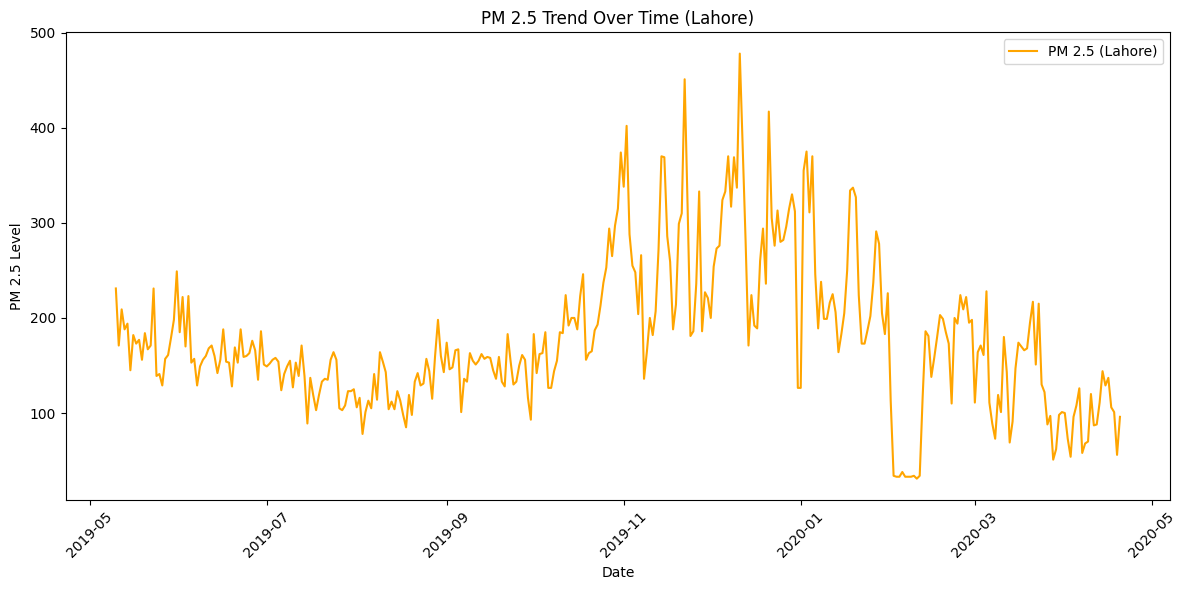

In [5]:
# Check for rows where 'Count' cannot be converted to float
invalid_rows = df[~df['Count'].apply(pd.to_numeric, errors='coerce').notnull()]
print(invalid_rows)

# Convert 'Count' column to numeric, replacing invalid values with NaN
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

# Optionally, fill NaN values with the mean or median of the column
df['Count'].fillna(df['Count'].mean(), inplace=True)

# Alternatively, drop rows with NaN values
# df = df.dropna(subset=['Count'])




# Plot AQI or PM 2.5 levels over time for a specific city (e.g., Lahore)
lahore_data = df[df['City'] == 'Lahore']
plt.figure(figsize=(12, 6))
plt.plot(lahore_data['Date'], lahore_data['Count'], label='PM 2.5 (Lahore)', color='orange')
plt.title('PM 2.5 Trend Over Time (Lahore)')
plt.xlabel('Date')
plt.ylabel('PM 2.5 Level')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\asdf\AppData\Local\Temp\ipykernel_11284\1162563746.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Count'].fillna(df['Count'].mean(), inplace=True)  # Alternatively, you can use .dropna() to drop rows


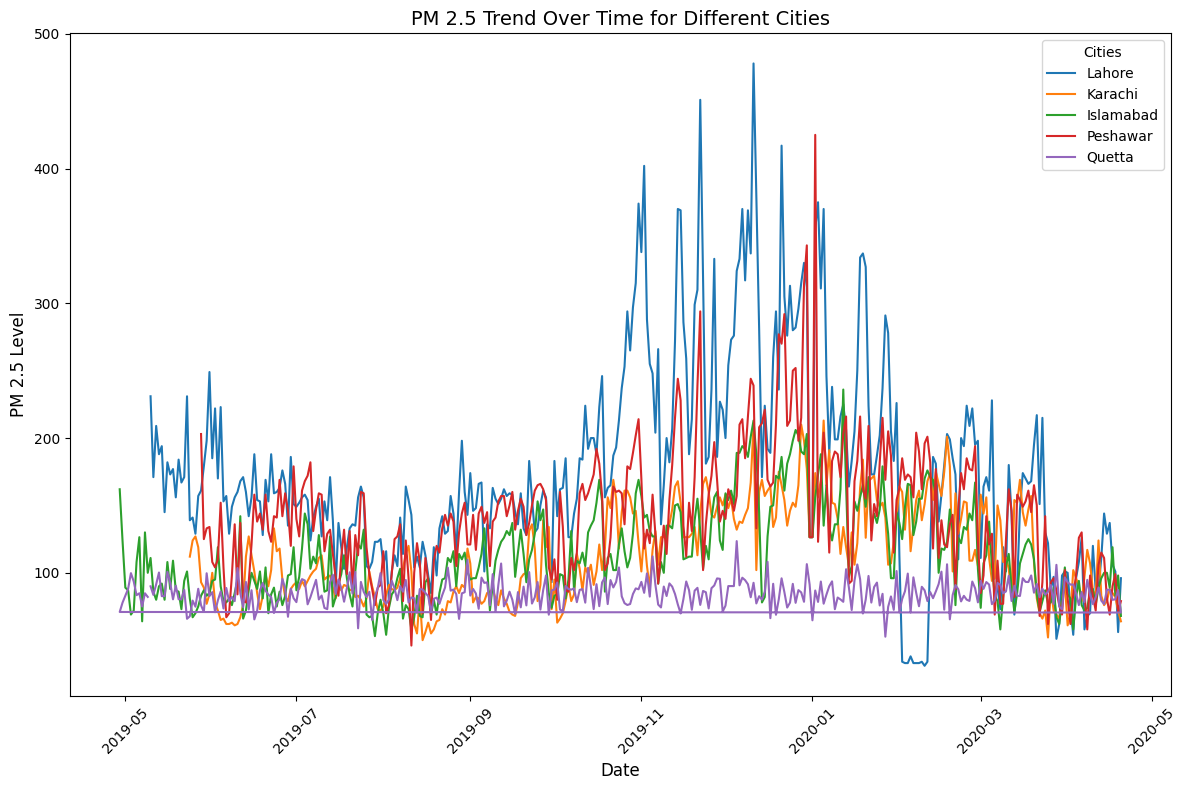

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = r"C:\Users\asdf\Downloads\aqi.xlsx"
df = pd.read_excel(dataset_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ensure 'Count' is numeric, handling any non-numeric values
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

# Fill or drop NaN values in 'Count'
df['Count'].fillna(df['Count'].mean(), inplace=True)  # Alternatively, you can use .dropna() to drop rows

# Get a list of unique cities
cities = df['City'].unique()

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Loop over each city and plot its PM 2.5 trend
for city in cities:
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['Count'], label=city)

# Add labels and title
plt.title('PM 2.5 Trend Over Time for Different Cities', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM 2.5 Level', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Cities", loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


City Wise Pollution Comparison Over Time

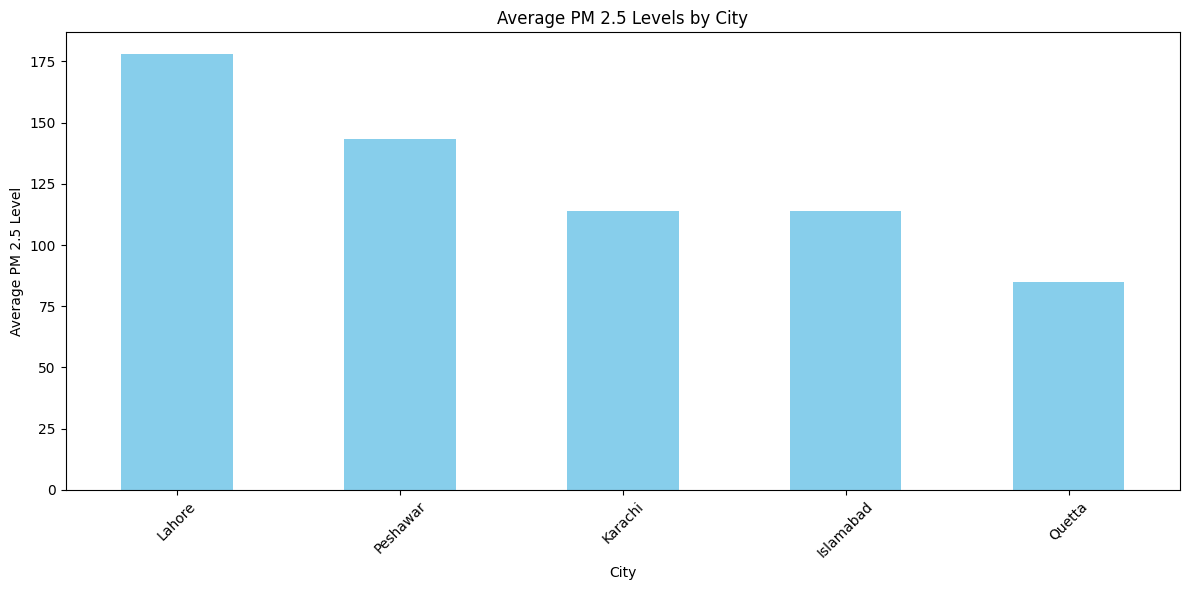

In [7]:
# Average PM 2.5 by City
city_avg_pollution = df.groupby('City')['Count'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
city_avg_pollution.plot(kind='bar', color='skyblue')
plt.title('Average PM 2.5 Levels by City')
plt.xlabel('City')
plt.ylabel('Average PM 2.5 Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Plotbox For Pollution Distribution 

C:\Users\asdf\AppData\Local\Temp\ipykernel_11284\970684546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Count', data=df, palette='Set2')


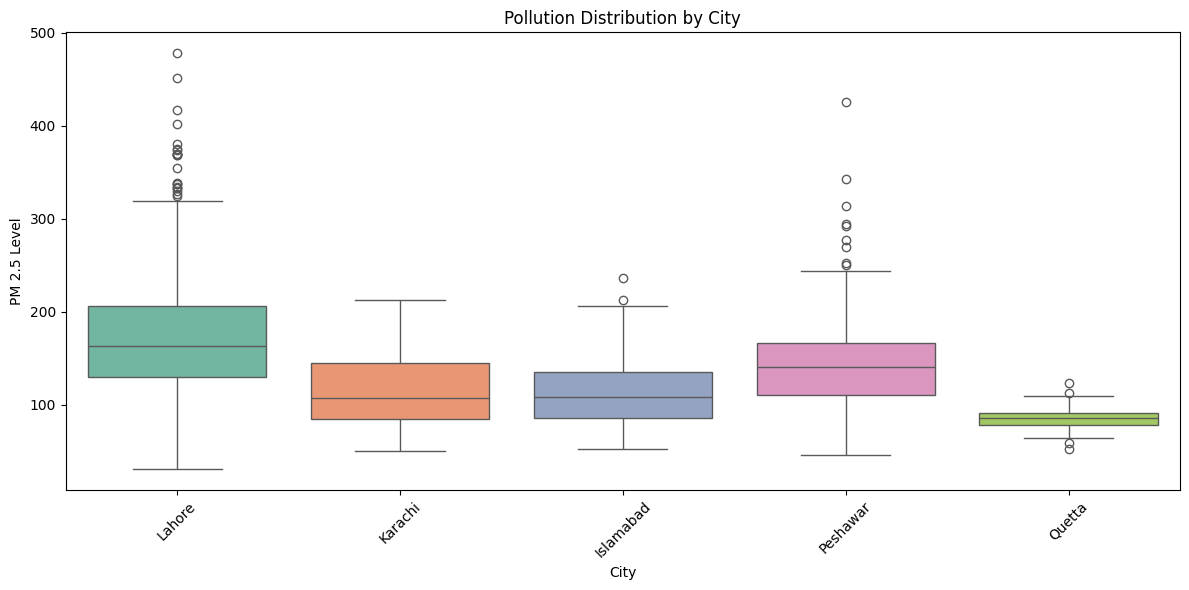

In [9]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Count', data=df, palette='Set2')
plt.title('Pollution Distribution by City')
plt.xlabel('City')
plt.ylabel('PM 2.5 Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Lahore Most Polluted Month 

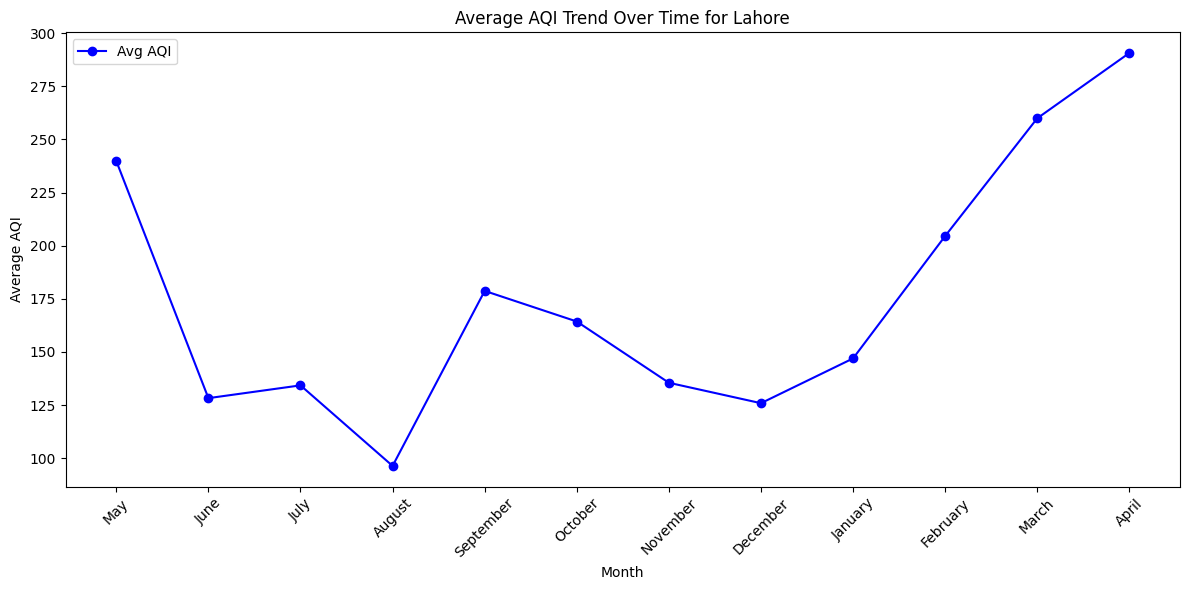

The most polluted month is: April with an average AQI of 290.66
The least polluted month is: August with an average AQI of 96.40


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset (assuming it's already loaded in 'df')
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()  # Convert month number to month name
df['Year'] = df['Date'].dt.year

# Filter data for Lahore (or any other city you'd like to analyze)
lahore_data = df[df['City'] == 'Lahore']

# Group by month and calculate the average AQI (Count) for each month
monthly_avg_aqi_lahore = lahore_data.groupby('Month')['Count'].mean()

# Create a list of month names for the x-axis
month_names = df['MonthName'].unique()

# Set up the plot size
plt.figure(figsize=(12, 6))

# Plot the average AQI trend over time for Lahore using a line plot
plt.plot(month_names, monthly_avg_aqi_lahore, marker='o', color='b', label='Avg AQI')

# Set title and labels
plt.title('Average AQI Trend Over Time for Lahore')
plt.xlabel('Month')
plt.ylabel('Average AQI')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Find the most polluted and least polluted months
most_polluted_month = monthly_avg_aqi_lahore.idxmax()  # Month with the highest average AQI
least_polluted_month = monthly_avg_aqi_lahore.idxmin()  # Month with the lowest average AQI

# Print the most and least polluted months
print(f"The most polluted month is: {month_names[most_polluted_month - 1]} with an average AQI of {monthly_avg_aqi_lahore.max():.2f}")
print(f"The least polluted month is: {month_names[least_polluted_month - 1]} with an average AQI of {monthly_avg_aqi_lahore.min():.2f}")

Least Polluted and Most Polluted For Islamabad

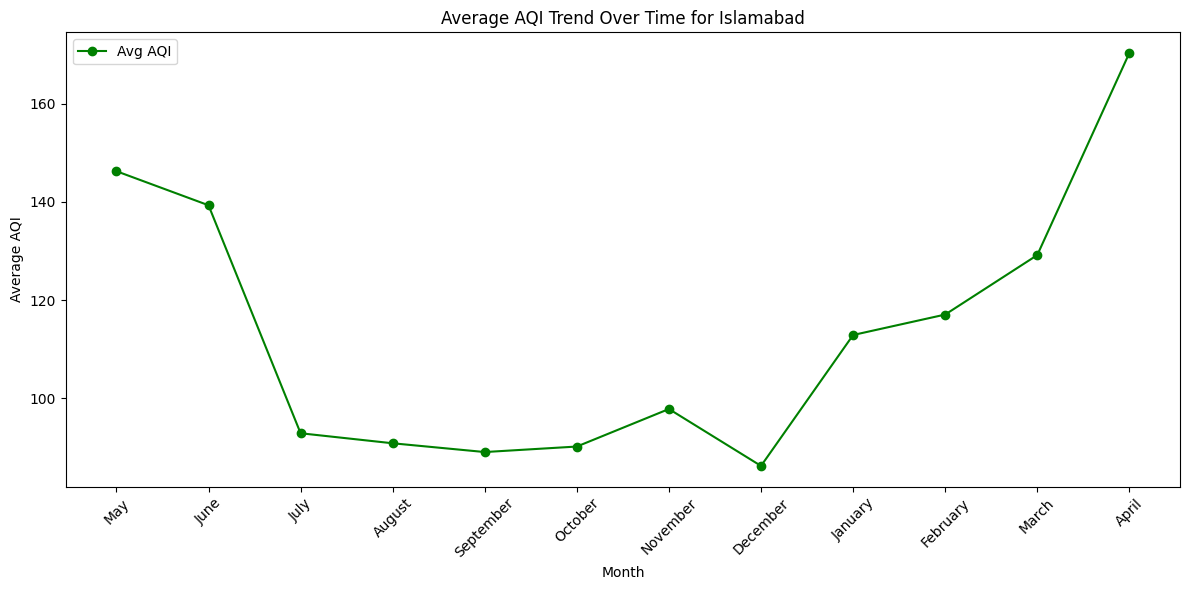

The most polluted month in Islamabad is: April with an average AQI of 170.30
The least polluted month in Islamabad is: December with an average AQI of 86.26


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()  # Convert month number to month name
df['Year'] = df['Date'].dt.year

# Filter data for Islamabad
islamabad_data = df[df['City'] == 'Islamabad']

# Group by month and calculate the average AQI (Count) for each month
monthly_avg_aqi_islamabad = islamabad_data.groupby('Month')['Count'].mean()

# Create a list of month names for the x-axis
month_names = df['MonthName'].unique()

# Set up the plot size
plt.figure(figsize=(12, 6))

# Plot the average AQI trend over time for Islamabad using a line plot
plt.plot(month_names, monthly_avg_aqi_islamabad, marker='o', color='g', label='Avg AQI')

# Set title and labels
plt.title('Average AQI Trend Over Time for Islamabad')
plt.xlabel('Month')
plt.ylabel('Average AQI')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Find the most polluted and least polluted months
most_polluted_month_islamabad = monthly_avg_aqi_islamabad.idxmax()  # Month with the highest average AQI
least_polluted_month_islamabad = monthly_avg_aqi_islamabad.idxmin()  # Month with the lowest average AQI

# Print the most and least polluted months for Islamabad
print(f"The most polluted month in Islamabad is: {month_names[most_polluted_month_islamabad - 1]} with an average AQI of {monthly_avg_aqi_islamabad.max():.2f}")
print(f"The least polluted month in Islamabad is: {month_names[least_polluted_month_islamabad - 1]} with an average AQI of {monthly_avg_aqi_islamabad.min():.2f}")


Least Polluted and Most Polluted For Karachi

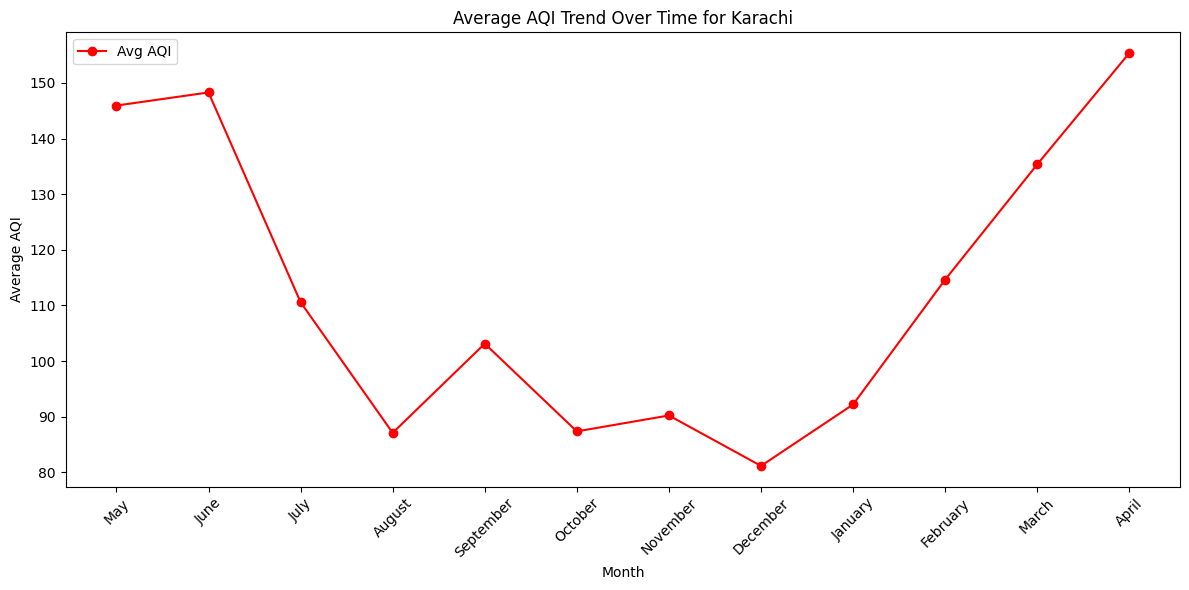

The most polluted month in Karachi is: April with an average AQI of 155.37
The least polluted month in Karachi is: December with an average AQI of 81.16


In [30]:


# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()  # Convert month number to month name
df['Year'] = df['Date'].dt.year

# Filter data for Karachi
karachi_data = df[df['City'] == 'Karachi']

# Group by month and calculate the average AQI (Count) for each month
monthly_avg_aqi_karachi = karachi_data.groupby('Month')['Count'].mean()

# Create a list of month names for the x-axis
month_names = df['MonthName'].unique()

# Set up the plot size
plt.figure(figsize=(12, 6))

# Plot the average AQI trend over time for Karachi using a line plot
plt.plot(month_names, monthly_avg_aqi_karachi, marker='o', color='r', label='Avg AQI')

# Set title and labels
plt.title('Average AQI Trend Over Time for Karachi')
plt.xlabel('Month')
plt.ylabel('Average AQI')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Find the most polluted and least polluted months for Karachi
most_polluted_month_karachi = monthly_avg_aqi_karachi.idxmax()  # Month with the highest average AQI
least_polluted_month_karachi = monthly_avg_aqi_karachi.idxmin()  # Month with the lowest average AQI

# Print the most and least polluted months for Karachi
print(f"The most polluted month in Karachi is: {month_names[most_polluted_month_karachi - 1]} with an average AQI of {monthly_avg_aqi_karachi.max():.2f}")
print(f"The least polluted month in Karachi is: {month_names[least_polluted_month_karachi - 1]} with an average AQI of {monthly_avg_aqi_karachi.min():.2f}")


Least Polluted And Most Polluted For Peshawar

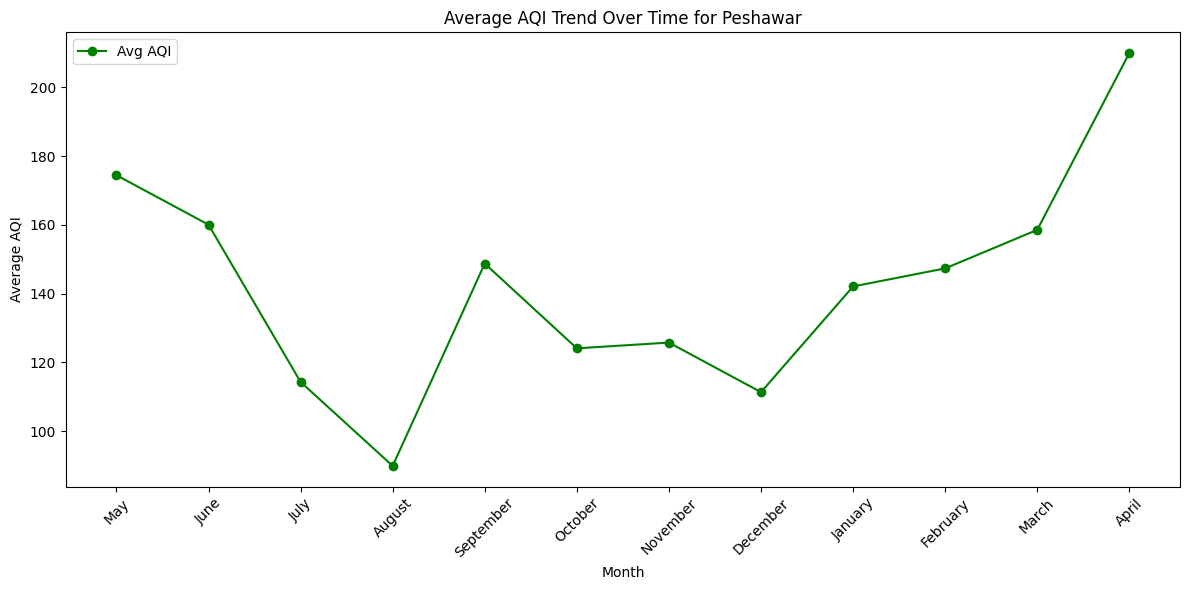

The most polluted month in Peshawar is: April with an average AQI of 210.01
The least polluted month in Peshawar is: August with an average AQI of 89.90


In [31]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()  # Convert month number to month name
df['Year'] = df['Date'].dt.year

# Filter data for Peshawar
peshawar_data = df[df['City'] == 'Peshawar']

# Group by month and calculate the average AQI (Count) for each month
monthly_avg_aqi_peshawar = peshawar_data.groupby('Month')['Count'].mean()

# Create a list of month names for the x-axis
month_names = df['MonthName'].unique()

# Set up the plot size
plt.figure(figsize=(12, 6))

# Plot the average AQI trend over time for Peshawar using a line plot
plt.plot(month_names, monthly_avg_aqi_peshawar, marker='o', color='g', label='Avg AQI')

# Set title and labels
plt.title('Average AQI Trend Over Time for Peshawar')
plt.xlabel('Month')
plt.ylabel('Average AQI')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Find the most polluted and least polluted months for Peshawar
most_polluted_month_peshawar = monthly_avg_aqi_peshawar.idxmax()  # Month with the highest average AQI
least_polluted_month_peshawar = monthly_avg_aqi_peshawar.idxmin()  # Month with the lowest average AQI

# Print the most and least polluted months for Peshawar
print(f"The most polluted month in Peshawar is: {month_names[most_polluted_month_peshawar - 1]} with an average AQI of {monthly_avg_aqi_peshawar.max():.2f}")
print(f"The least polluted month in Peshawar is: {month_names[least_polluted_month_peshawar - 1]} with an average AQI of {monthly_avg_aqi_peshawar.min():.2f}")

Least Polluted And Most Polluted for Quetta


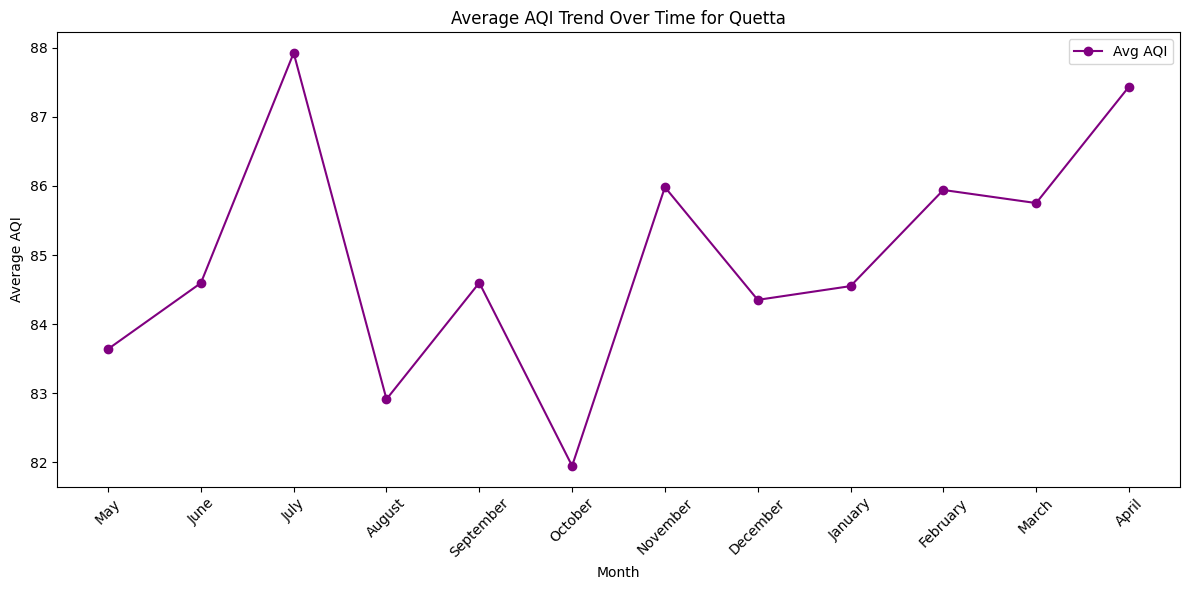

The most polluted month in Quetta is: July with an average AQI of 87.92
The least polluted month in Quetta is: October with an average AQI of 81.95


In [32]:

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()  # Convert month number to month name
df['Year'] = df['Date'].dt.year

# Filter data for Quetta
quetta_data = df[df['City'] == 'Quetta']

# Group by month and calculate the average AQI (Count) for each month
monthly_avg_aqi_quetta = quetta_data.groupby('Month')['Count'].mean()

# Create a list of month names for the x-axis
month_names = df['MonthName'].unique()

# Set up the plot size
plt.figure(figsize=(12, 6))

# Plot the average AQI trend over time for Quetta using a line plot
plt.plot(month_names, monthly_avg_aqi_quetta, marker='o', color='purple', label='Avg AQI')

# Set title and labels
plt.title('Average AQI Trend Over Time for Quetta')
plt.xlabel('Month')
plt.ylabel('Average AQI')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Find the most polluted and least polluted months for Quetta
most_polluted_month_quetta = monthly_avg_aqi_quetta.idxmax()  # Month with the highest average AQI
least_polluted_month_quetta = monthly_avg_aqi_quetta.idxmin()  # Month with the lowest average AQI

# Print the most and least polluted months for Quetta
print(f"The most polluted month in Quetta is: {month_names[most_polluted_month_quetta - 1]} with an average AQI of {monthly_avg_aqi_quetta.max():.2f}")
print(f"The least polluted month in Quetta is: {month_names[least_polluted_month_quetta - 1]} with an average AQI of {monthly_avg_aqi_quetta.min():.2f}")
